# Dataset 3: Air-Quality Dataset (PRSA_Data_Tiantan20130301-20170228.csv) - Weiwei Wang

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preprocessing

In [2]:
df = pd.read_csv("PRSA_Data_Tiantan_20130301-20170228.csv")
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


In [3]:
df.shape

(35064, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [5]:
df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       677
PM10        597
SO2        1118
NO2         744
CO         1126
O3          843
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [6]:
df["year"].unique()

array([2013, 2014, 2015, 2016, 2017], dtype=int64)

In [7]:
df["month"].unique()

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2], dtype=int64)

In [8]:
df["day"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

In [9]:
df["hour"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [10]:
df["station"].unique()

array(['Tiantan'], dtype=object)

In [11]:
df["wd"].unique()

array(['NNW', 'NW', 'N', 'W', 'ENE', 'NE', 'E', 'NNE', 'SW', 'SSW', 'S',
       'WSW', 'ESE', 'SE', 'WNW', 'SSE', nan], dtype=object)

#### Since there is no null value in year, month, day, and hour, and their values appear to be proper. Those four columns will be combined into one datatime column in datetime format.

#### No column is only data series number which is not essential for further analysis, it will be dropped. Station column only contian one unqiue value of Tiantan, it will be dropped as well.

#### wd column is categorical, it will be transformed into numerical by sine cosine encoding for further imputation.

In [12]:
df['Datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df = df[['Datetime'] + [col for col in df.columns if col != 'Datetime']]
df = df.drop(columns=['year', 'month', 'day', 'hour', 'station', 'No'])
wd_map = {'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5, 'E': 90, 'ESE': 112.5, 'SE': 135, 'SSE': 157.5, 'S': 180, 'SSW': 202.5, 'SW': 225, 'WSW': 247.5, 'W': 270, 'WNW': 292.5, 'NW': 315, 'NNW': 337.5}
df['wd_angle'] = df['wd'].map(wd_map)
df['wd_sin'] = np.sin(np.radians(df['wd_angle']))
df['wd_cos'] = np.cos(np.radians(df['wd_angle']))
df.drop(columns=['wd', 'wd_angle'], inplace=True)
df = df[['Datetime'] + [col for col in df.columns if col != 'Datetime']]
df.head()

,Datetime,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd_sin,wd_cos
0,2013-03-01 00:00:00,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,5.7,-0.382683,0.923880
1,2013-03-01 01:00:00,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,3.9,-0.707107,0.707107
2,2013-03-01 02:00:00,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,5.3,-0.382683,0.923880
3,2013-03-01 03:00:00,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,4.9,0.000000,1.000000
4,2013-03-01 04:00:00,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,3.2,-0.382683,0.923880


In [13]:
df.shape

(35064, 14)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Datetime  35064 non-null  datetime64[ns]
 1   PM2.5     34387 non-null  float64       
 2   PM10      34467 non-null  float64       
 3   SO2       33946 non-null  float64       
 4   NO2       34320 non-null  float64       
 5   CO        33938 non-null  float64       
 6   O3        34221 non-null  float64       
 7   TEMP      35044 non-null  float64       
 8   PRES      35044 non-null  float64       
 9   DEWP      35044 non-null  float64       
 10  RAIN      35044 non-null  float64       
 11  WSPM      35050 non-null  float64       
 12  wd_sin    34986 non-null  float64       
 13  wd_cos    34986 non-null  float64       
dtypes: datetime64[ns](1), float64(13)
memory usage: 3.7 MB


In [15]:
null_count = df.isnull().sum()
null_percentage = (null_count / len(df)) * 100
null_distribution = pd.DataFrame({
    'Missing Values Count': null_count,
    'Percentage (%)': null_percentage
}).sort_values(by='Missing Values Count', ascending=False)
null_distribution

,Missing Values Count,Percentage (%)
CO,1126,3.211271
SO2,1118,3.188455
O3,843,2.404175
NO2,744,2.121834
PM2.5,677,1.930755
PM10,597,1.702601
wd_sin,78,0.222450
wd_cos,78,0.222450
TEMP,20,0.057039
PRES,20,0.057039


## Imputation Techniques: Regression Imputation

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [17]:
num_col = df.select_dtypes(include=['number']).columns
null_col = df.columns[df.isnull().any()]
df_ri = df.copy()

for i in null_col:
    target = df_ri[i]
    features = df_ri[num_col].drop(columns=[i], errors='ignore')
    complete_cases = target.notnull() & features.notnull().all(axis=1)
    X_train, X_test, y_train, y_test = train_test_split(features[complete_cases], target[complete_cases], test_size=0.2, random_state=8)
    model_pipeline = Pipeline([('imputer', SimpleImputer(strategy='mean')),('regressor', LinearRegression())])
    model_pipeline.fit(X_train, y_train)
    missing_mask = target.isnull()
    if missing_mask.sum() > 0:
        df_ri.loc[missing_mask, i] = model_pipeline.predict(features.loc[missing_mask])

null_ri = df_ri.isnull().sum()
null_ri

Datetime    0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
WSPM        0
wd_sin      0
wd_cos      0
dtype: int64

## Imputation Techniques: KNN Imputation

In [18]:
from sklearn.impute import KNNImputer

In [19]:
df_knn = df.copy()
knn_imputer = KNNImputer(n_neighbors=5)
df_knn[num_col] = knn_imputer.fit_transform(df_knn[num_col])
null_knn = df_knn.isnull().sum()
null_knn

Datetime    0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
WSPM        0
wd_sin      0
wd_cos      0
dtype: int64

## Imputation Techniques: Iterative Imputation

In [20]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor

In [21]:
df_iter = df.copy()
iter_imputer = IterativeImputer(estimator=DecisionTreeRegressor(random_state=8), max_iter=10, random_state=8)
df_iter[num_col] = iter_imputer.fit_transform(df_iter[num_col])
null_iter = df_iter.isnull().sum()
null_iter

c:\Users\kavi9\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Datetime    0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
WSPM        0
wd_sin      0
wd_cos      0
dtype: int64

## Comparison of Imputation Methods

In [22]:
from sklearn.metrics import mean_squared_error

def calculate_rmse(imputed_df, original_df, i):
    mask = original_df[i].isnull()
    if mask.sum() == 0:
        return np.nan
    actual_values = imputed_df.loc[mask, i].dropna()
    if actual_values.empty:
        return np.nan
    return np.sqrt(mean_squared_error(np.zeros_like(actual_values), actual_values))

rmse_results = { method: {i: calculate_rmse(df_imputed, df, i) for i in num_col} for method, df_imputed in zip(["Regression", "KNN", "Iterative"], [df_ri, df_knn, df_iter])}
rmse_df = pd.DataFrame(rmse_results).T
print(rmse_df)

                 PM2.5        PM10        SO2        NO2           CO  \
Regression   83.098368  118.152039  16.886314  59.872574  1666.146282   
KNN          99.279334  121.421049  20.341843  59.942048  1761.022240   
Iterative   103.431751  161.978083  32.035831  67.858189  1889.680639   

                   O3       TEMP         PRES       DEWP      RAIN      WSPM  \
Regression  61.856922  13.982756  1012.462520   2.526886  0.089711  1.858392   
KNN         64.872454  15.247100  1012.914857   9.729364  0.177708  1.930463   
Iterative   79.189698  18.007485  1013.900896  14.876088  8.254090  1.722540   

              wd_sin    wd_cos  
Regression  0.471937  0.202560  
KNN         0.498572  0.441369  
Iterative   0.881921  0.478147  


#### Above is the Root Mean Square Error result for each imputation method used.

#### Regression imputation has the lowest RMSE for most variables , so it is the best imputation method among them based on RMSE values.

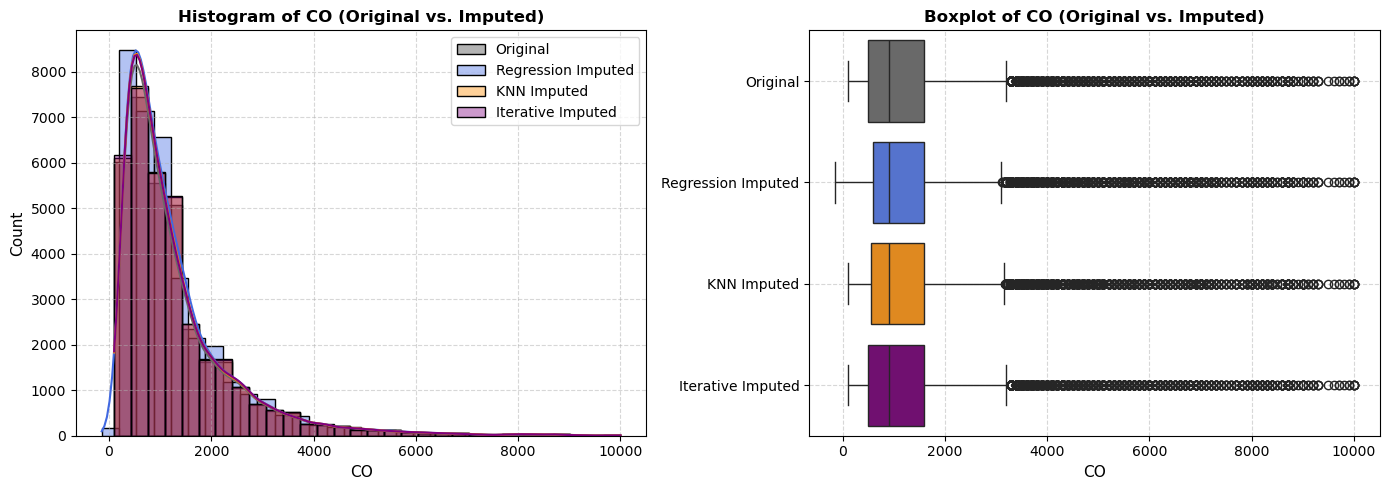

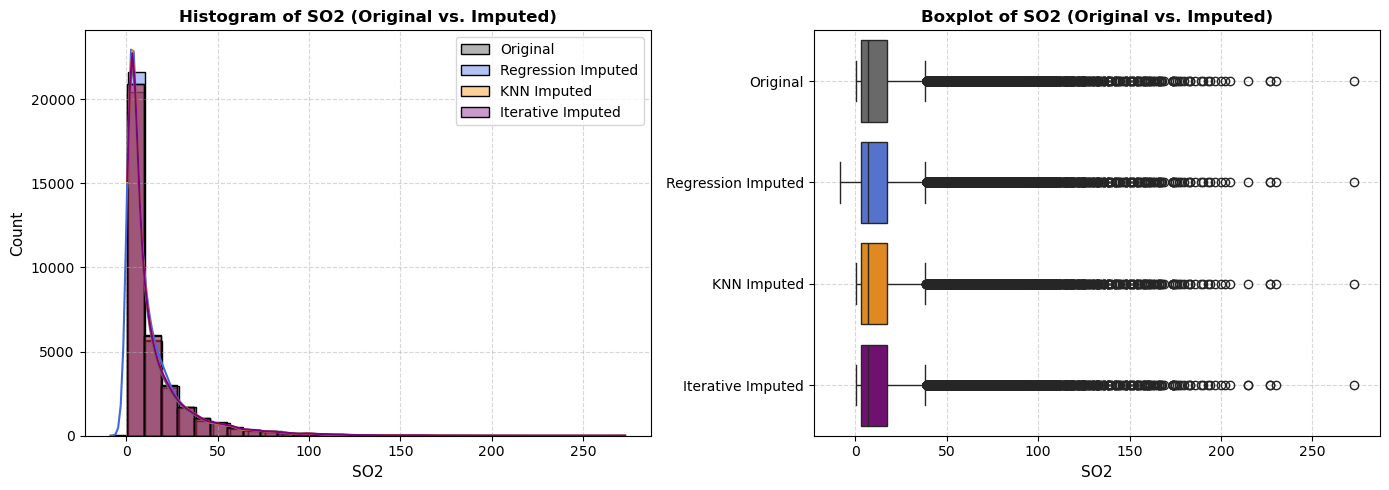

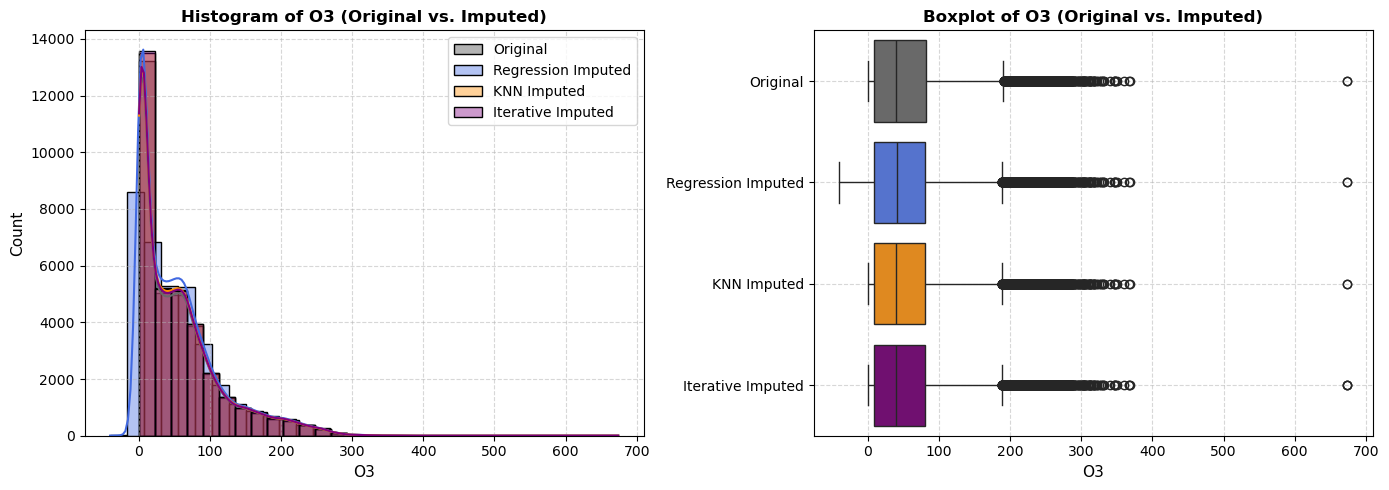

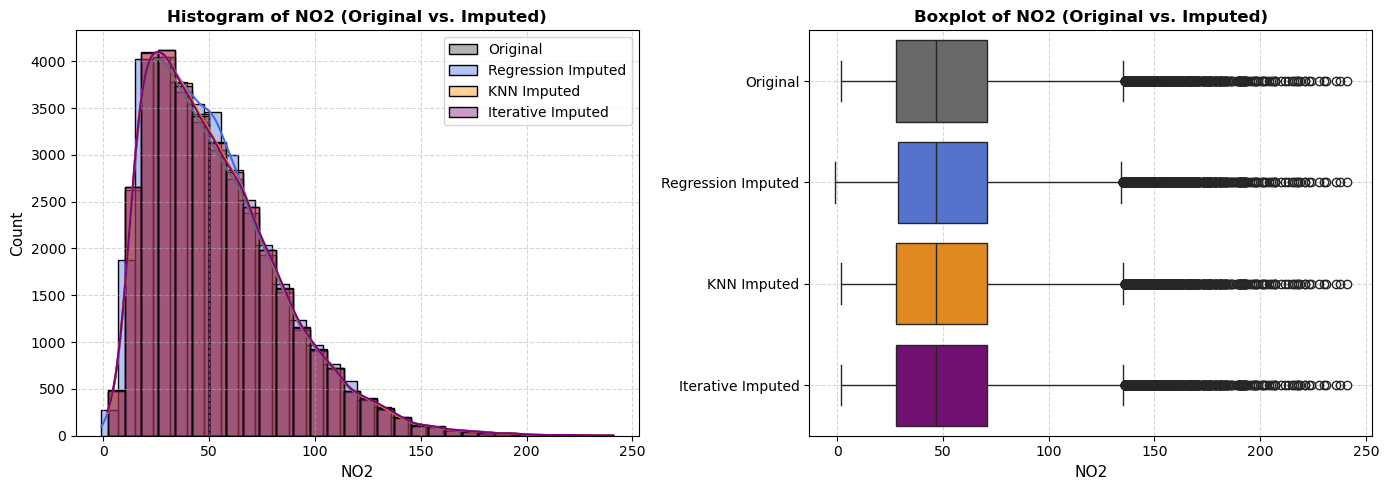

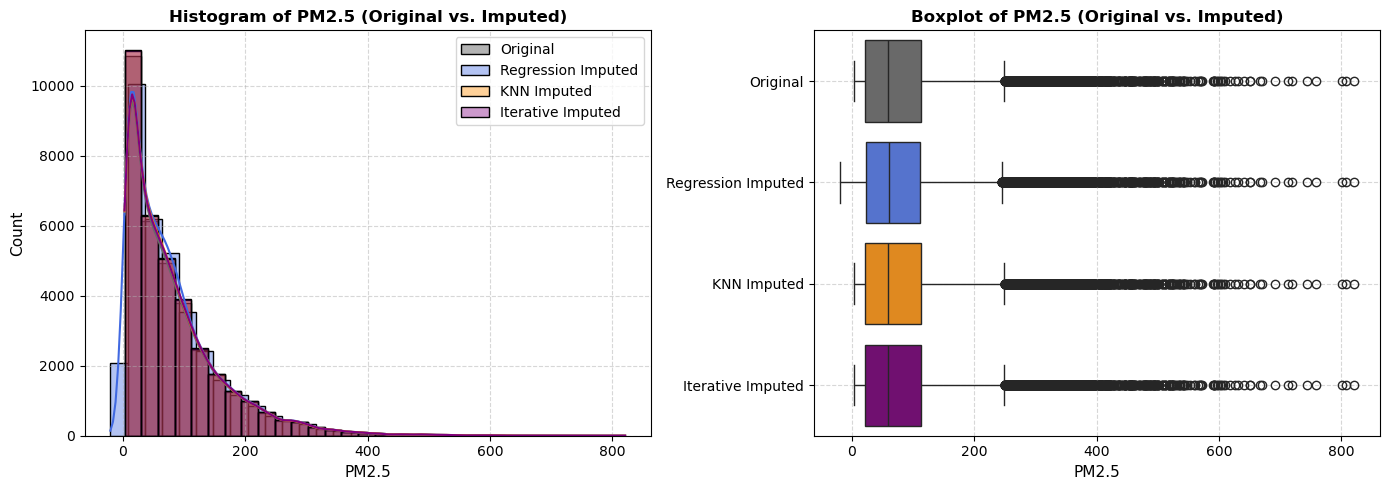

In [23]:
col_plot = ['CO', 'SO2', 'O3', 'NO2', 'PM2.5']
colors = {"Original": "dimgray", "Regression Imputed": "royalblue", "KNN Imputed": "darkorange", "Iterative Imputed": "purple"}

for i in col_plot:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    sns.histplot(df[i], bins=30, color=colors["Original"], label="Original", kde=True, alpha=0.5, edgecolor="black", ax=axes[0])
    sns.histplot(df_ri[i], bins=30, color=colors["Regression Imputed"], label="Regression Imputed", kde=True, alpha=0.4, edgecolor="black", ax=axes[0])
    sns.histplot(df_knn[i], bins=30, color=colors["KNN Imputed"], label="KNN Imputed", kde=True, alpha=0.4, edgecolor="black", ax=axes[0])
    sns.histplot(df_iter[i], bins=30, color=colors["Iterative Imputed"], label="Iterative Imputed", kde=True, alpha=0.4, edgecolor="black", ax=axes[0])
    axes[0].set_title(f"Histogram of {i} (Original vs. Imputed)", fontsize=12, fontweight="bold")
    axes[0].set_xlabel(i, fontsize=11)
    axes[0].set_ylabel("Count", fontsize=11)
    axes[0].legend(loc="upper right", fontsize=10, frameon=True)
    axes[0].grid(True, linestyle="--", alpha=0.5)

    sns.boxplot(data=pd.DataFrame({"Original": df[i], "Regression Imputed": df_ri[i], "KNN Imputed": df_knn[i], "Iterative Imputed": df_iter[i]}), orient="h", palette=colors, ax=axes[1])
    axes[1].set_title(f"Boxplot of {i} (Original vs. Imputed)", fontsize=12, fontweight="bold")
    axes[1].set_xlabel(i, fontsize=11)
    axes[1].grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

#### Above are histograms and boxplots for original vs. imputation of the top 5 missing variables by percentage.

#### Looking at histograms, regression imputation closely follows the original distribution in all cases and align well with the original density.

#### On boxplots, regression imputation's median and quartiles closely match the original data, the outlier distribution is consistent with the original as well.

#### Therefore, regression imputation performs the best among them based on histograms and boxplots, which is also an identical finding from the RMSE.

## Impact on Predictive Modeling

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
df_valid = df.dropna()
tar_var = ['CO', 'SO2', 'O3']

def rf(df_train, name):
    results = {}
    for i in tar_var:
        X = df_train[num_col].drop(columns=[i], errors='ignore')
        y = df_train[i]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)
        rf_model = RandomForestRegressor(n_estimators=100, random_state=8)
        rf_model.fit(X_train, y_train)
        y_pred = rf_model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        results[i] = rmse
    print(f"RMSE for {name}:")
    for key, value in results.items():
        print(f"{key}: {value:.5f}")
    return results

rf_result = {}
rf_result["Original"] = rf(df_valid, "Original")
rf_result["Regression Imputation"] = rf(df_ri, "Regression Imputation")
rf_result["KNN Imputation"] = rf(df_knn, "KNN Imputation")
rf_result["Iterative Imputation"] = rf(df_iter, "Iterative Imputation")
rf_result_df = pd.DataFrame.from_dict(rf_result, orient='index')
print(rf_result_df)

RMSE for Original:
CO: 428.97434
SO2: 10.04180
O3: 20.64405
RMSE for Regression Imputation:
CO: 443.76673
SO2: 11.17443
O3: 20.65128
RMSE for KNN Imputation:
CO: 443.20267
SO2: 11.28329
O3: 20.89811
RMSE for Iterative Imputation:
CO: 446.20550
SO2: 11.30176
O3: 21.92636
                               CO        SO2         O3
Original               428.974343  10.041804  20.644049
Regression Imputation  443.766728  11.174426  20.651284
KNN Imputation         443.202673  11.283287  20.898107
Iterative Imputation   446.205498  11.301759  21.926356


#### For a more efficient model execution, only the top 3 variables with the most missing values were used in the Random Forest Regressor. The original dataset achieved the lowest RMSE for CO (428.97), SO₂ (10.04), and O₃ (20.64), suggesting that the presence of missing data had minimal impact on model performance. Among the imputation methods, Regression Imputation consistently outperformed KNN and Iterative Imputation, producing RMSE values closest to the original dataset. In contrast, Iterative Imputation yielded the highest RMSE which performed the worst among them. Regression Imputation proved to be the best method for imputation on this dataset again based on random forest regressor.

## Report and Discussion

### The analysis revealed that Regression Imputation was the most effective method for imputing data in this dataset. It consistently yielded RMSE values that were closest to those of the original dataset, surpassing the performance of both KNN and Iterative Imputation. Additionally, the histograms and boxplots demonstrated that Regression Imputation closely aligns with the original data distribution, effectively preserving the variance and structure of critical variables such as CO, SO2, O3, NO2, and PM2.5. Although KNN showed comparable results, it slightly modified the data distribution, while Iterative Imputation exhibited the highest RMSE, indicating an increase in inconsistencies within the data.

### A notable trend across all imputation techniques was the observation that the imputed data consistently resulted in marginally higher RMSE values compared to the original data. This indicates that while imputation facilitates the retention of more data, it also introduces estimation errors. Iterative Imputation consistently underperformed, likely due to issues related to overfitting or excessive variability in the imputed values. Therefore, Regression Imputation is favoured for this dataset as it strikes a balance between predictive accuracy and the preservation of the statistical characteristics of the data.